In [1]:
pip install qiskit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 36.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 53.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 19.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.5/108.5 kB 5.2 MB/s eta 0:00:00


See this Google Doc for visualization examples and explanations: https://docs.google.com/document/d/1iAjE7x8SL4PWz-8kUF0pRipUyEHb0YBnMHZq1lEd_QM/edit

In [10]:
# Useful packages for the next gates experiments
import numpy as np
from qiskit import *
qr = QuantumRegister(2)
cr = ClassicalRegister(2)
circuit = QuantumCircuit(qr, cr)
circuit = QuantumCircuit(2,2)
circuit.draw()


q_0: 
     
q_1: 
     
c: 2/

Density Matrix Simulations

In [13]:
# https://docs.quantum.ibm.com/api/qiskit/qiskit.quantum_info.DensityMatrix
from qiskit.quantum_info import DensityMatrix

rho = DensityMatrix.from_label('+0')

# Probabilities for measuring both qubits
probs = rho.probabilities([0, 1])
print('probs: {}'.format(probs))

# Probabilities for measuring both qubits
# but swapping qubits 0 and 1 in output
probs_swapped = rho.probabilities([1, 0])
print('Swapped probs: {}'.format(probs_swapped))

probs: [0.5 0.  0.5 0. ]
Swapped probs: [0.5 0.5 0.  0. ]


In [14]:
from qiskit.quantum_info import DensityMatrix

rho = DensityMatrix.from_label('-0')
print(rho.to_dict())

{'00|00': (0.4999999999999999+0j), '10|00': (-0.4999999999999999-0j), '00|10': (-0.4999999999999999+0j), '10|10': (0.4999999999999999+0j)}


In [15]:
import numpy as np
from qiskit.quantum_info import DensityMatrix

mat = np.zeros((9, 9))
mat[0, 0] = 0.25
mat[3, 3] = 0.25
mat[6, 6] = 0.25
mat[-1, -1] = 0.25
rho = DensityMatrix(mat, dims=(3, 3))
print(rho.to_dict())

{'00|00': (0.25+0j), '10|10': (0.25+0j), '20|20': (0.25+0j), '22|22': (0.25+0j)}


In [16]:
import numpy as np
from qiskit.quantum_info import DensityMatrix

mat = np.zeros((2 * 10, 2 * 10))
mat[0, 0] = 0.5
mat[-1, -1] = 0.5
rho = DensityMatrix(mat, dims=(2, 10))
print(rho.to_dict())

{'00|00': (0.5+0j), '91|91': (0.5+0j)}


Bloch Sphere

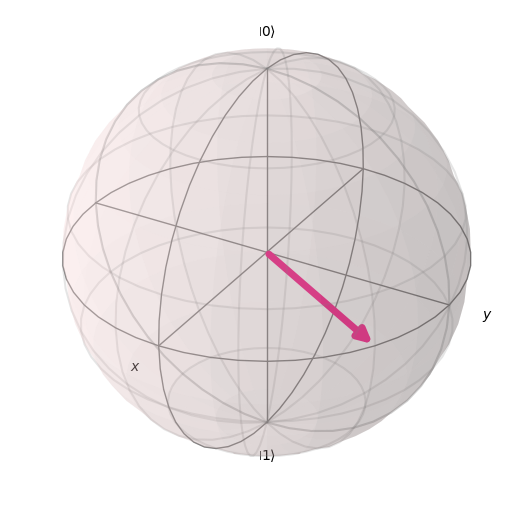

In [17]:
import numpy as np
from qiskit.visualization import plot_bloch_vector

# You can use spherical coordinates instead of cartesian.

plot_bloch_vector([1, np.pi/2, np.pi/3], coord_type='spherical')

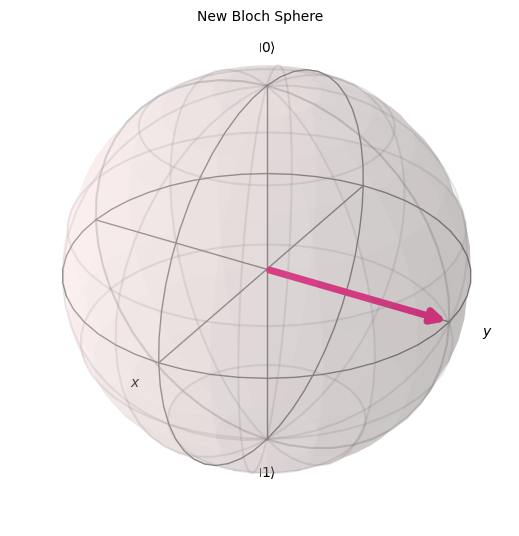

In [18]:
from qiskit.visualization import plot_bloch_vector

plot_bloch_vector([0,1,0], title="New Bloch Sphere")

In [20]:
pip install qutip

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.0/28.0 MB 41.2 MB/s eta 0:00:00


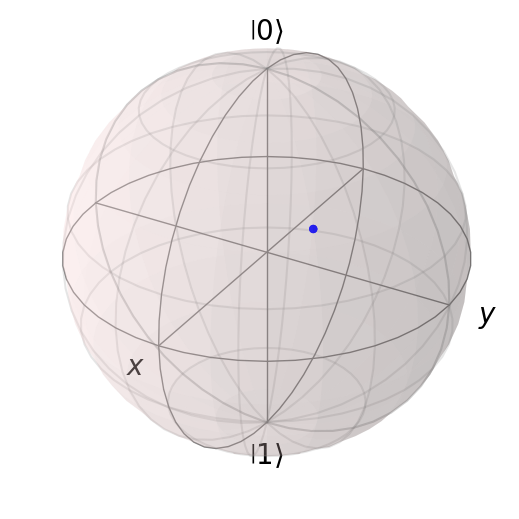

In [26]:
# https://qutip.org/docs/4.0.2/guide/guide-bloch.html
from qutip import *
b = Bloch()

pnt = [1/np.sqrt(3),1/np.sqrt(3),1/np.sqrt(3)]

b.add_points(pnt)

b.show()



Common Quantum States and Their Density Matrices


1. The “uniform superposition” = \ket{+}^n = 1/sqrt(2^n) * \sum_{i=0}^{2^n - 1} \ket{i}
State Vector:
1/sqrt(2^n) [ 1 1 1 1 … 1]
Density Matrix:
½ * all-ones matrix of dimension 2^n.

2. The Bell State (|00> + |11>)/sqrt(2)

State Vector: 1/sqrt(2) * [1 1]
Density Matrix:
½ *
[ 1 0 0 1
  0 0 0 0
  0 0 0 0
  1 0 0 1]

Reduced Density Matrix:
½ *
[1 0
 0 1]

3. The Y-state:
cos(theta/2) |0> - i sin(theta/2) |1>.

Density Matrix:
[ cos(theta/2)^2,   cos(theta/2) * i sin(theta/2)
 cos(theta/2) * - i sin(theta/2), sin(theta/2)^2]


In [32]:
# https://learning.quantum.ibm.com/course/general-formulation-of-quantum-information/density-

# Required imports for code cells

from qiskit.quantum_info import Statevector, Operator, DensityMatrix
from qiskit.visualization import array_to_latex
import numpy as np
from numpy import linalg

# Randomly generate a positive semidefinite matrix

n = 3
M = np.random.randint(-9, 10, size=(n, n)) + 1j * np.random.randint(-9, 10, size=(n, n))
P = M.conj().T @ M

print("Randomly generated matrix")
display(array_to_latex(P))
# Compute the eigenvalues (in decreasing order)
print("Eigenvalyues")
display(array_to_latex(np.sort(linalg.eigvals(P))[::-1]))
# Randomly generate a density matrix

n = 3
M = np.random.randint(-9, 10, size=(n, n)) + 1j * np.random.randint(-9, 10, size=(n, n))
P = M.conj().T @ M
rho = P/np.trace(P)
print("Density Matrix")
display(array_to_latex(rho))

print("Eigenvalues")
# Compute the eigenvalues (in decreasing order)

display(array_to_latex(np.sort(linalg.eigvals(rho))[::-1]))
print("Density Matrix")
# Initialize and display a density matrix
# using the DensityMatrix package

rho = DensityMatrix([[3/4, 1j/8],[-1j/8,1/4]])
display(rho.draw('latex'))

Randomly generated matrix


<IPython.core.display.Latex object>

Eigenvalyues


<IPython.core.display.Latex object>

Density Matrix


<IPython.core.display.Latex object>

Eigenvalues


<IPython.core.display.Latex object>

Density Matrix


<IPython.core.display.Latex object>

In [33]:
# Define and display examples of density matrices
# using the Statevector package

ket_0 = Statevector.from_label('0')
ket_1 = Statevector.from_label('1')
ket_plus = Statevector.from_label('+')
ket_minus = Statevector.from_label('-')
ket_iplus = Statevector.from_label('r')
ket_iminus = Statevector.from_label('l')
v = Statevector([(1 + 2j) / 3, -2 / 3])

display(array_to_latex(ket_0.to_operator()))
display(array_to_latex(ket_1.to_operator()))
display(array_to_latex(ket_plus.to_operator()))
display(array_to_latex(ket_minus.to_operator()))
display(array_to_latex(ket_iplus.to_operator()))
display(array_to_latex(ket_iminus.to_operator()))
display(array_to_latex(v.to_operator()))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [34]:
# Define and display examples of density matrices
# using the DensityMatrix package

rho_0 = DensityMatrix.from_label('0')
rho_1 = DensityMatrix.from_label('1')
rho_plus = DensityMatrix.from_label('+')
rho_minus = DensityMatrix.from_label('-')
rho_iplus = DensityMatrix.from_label('r')
rho_iminus = DensityMatrix.from_label('l')

display(rho_0.draw('latex'))
display(rho_1.draw('latex'))
display(rho_plus.draw('latex'))
display(rho_minus.draw('latex'))
display(rho_iplus.draw('latex'))
display(rho_iminus.draw('latex'))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

More Bloch Sphere Implementation

Imports loaded.


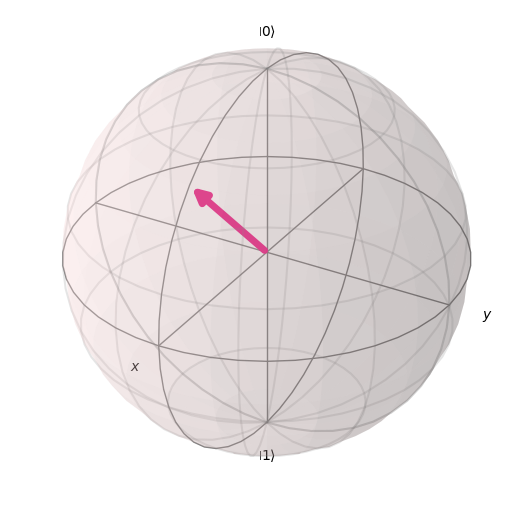

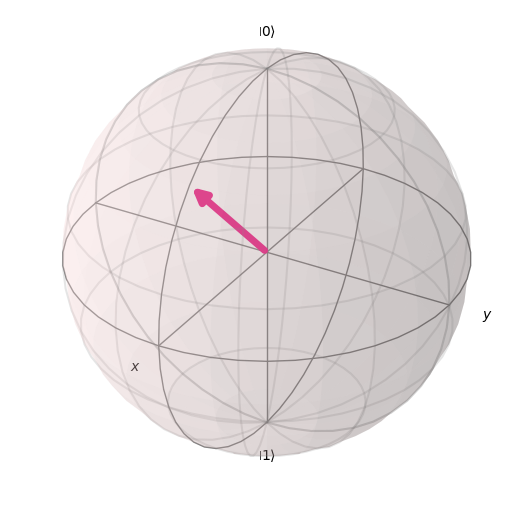

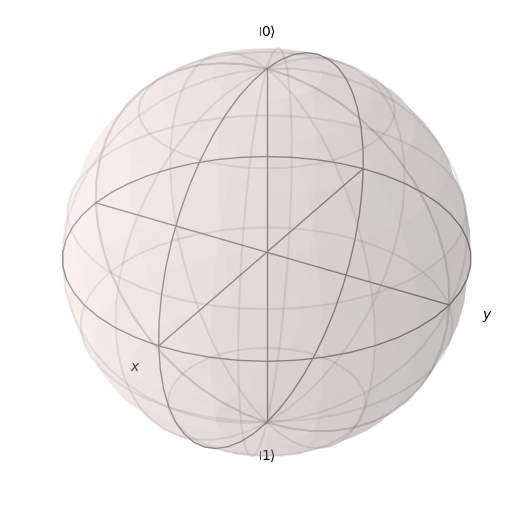

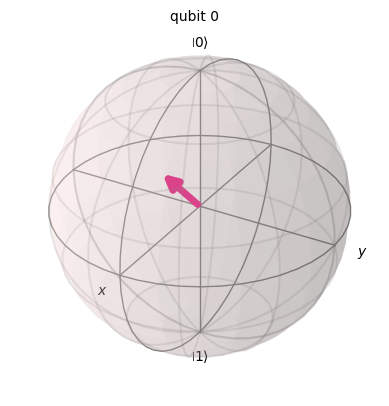

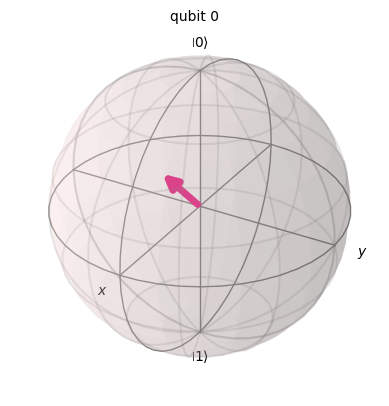

In [36]:
# Required imports for code cells

from qiskit.quantum_info import DensityMatrix
from qiskit.visualization import plot_bloch_multivector, plot_bloch_vector
from numpy import sin, cos, pi

print('Imports loaded.')
# Plot Bloch sphere points in Cartesian and
# spherical coordinates using plot_bloch_vector

display(plot_bloch_vector([sin(pi/4),0,cos(pi/4)]))
display(plot_bloch_vector([1, pi/4, 0], coord_type='spherical'))
# Plot the center point of the Bloch ball
# using plot_bloch_vector

display(plot_bloch_vector([0,0,0]))
# Plot a Bloch ball point using plot_bloch_multivector

rho = DensityMatrix([[3/4, 1/4],[1/4,1/4]])
display(plot_bloch_multivector(rho))
# Plot a Bloch ball point using the
# DensityMatrix draw method

display(rho.draw('bloch'))

Reduced States in Qiskit

Imports loaded.


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

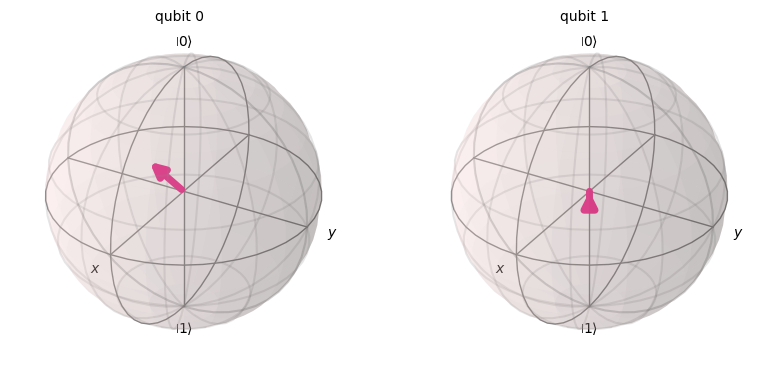

In [37]:
# Required imports for code cells

from qiskit.quantum_info import DensityMatrix, partial_trace
from qiskit.visualization import plot_bloch_multivector

print('Imports loaded.')
# Define and display a density matrix for a two-qubit
# correlated state along with reduced states

rho_0 = DensityMatrix.from_label('0')
rho_1 = DensityMatrix.from_label('1')
rho_plus = DensityMatrix.from_label('+')
rho = 1/2 * rho_0.tensor(rho_0) + 1/2 * rho_1.tensor(rho_plus)

display(rho.draw('latex'))
display(partial_trace(rho, [0]).draw(output='latex'))
display(partial_trace(rho, [1]).draw(output='latex'))
# Plot Bloch ball representations for
# the two reduced states

display(plot_bloch_multivector(rho))

Qutip Visualizations

Visualizing operators
Sometimes, it may also be useful to directly visualizing the underlying matrix representation of an operator. The density matrix, for example, is an operator whose elements can give insights about the state it represents, but one might also be interesting in plotting the matrix of an Hamiltonian to inspect the structure and relative importance of various elements.

QuTiP offers a few functions for quickly visualizing matrix data in the form of histograms, qutip.visualization.matrix_histogram and qutip.visualization.matrix_histogram_complex, and as Hinton diagram of weighted squares, qutip.visualization.hinton. These functions takes a qutip.Qobj.Qobj as first argument, and optional arguments to, for example, set the axis labels and figure title (see the function’s documentation for details).

For example, to illustrate the use of qutip.visualization.matrix_histogram, let’s visualize of the Jaynes-Cummings Hamiltonian:

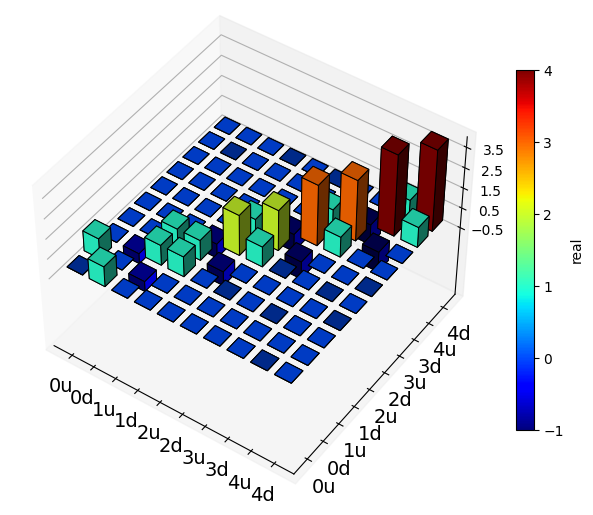

In [41]:
# https://qutip.org/docs/4.0.2/guide/guide-visualization.html

import matplotlib.pyplot as plt

N = 5

a = tensor(destroy(N), qeye(2))

b = tensor(qeye(N), destroy(2))

sx = tensor(qeye(N), sigmax())

H = a.dag() * a + sx - 0.5 * (a * b.dag() + a.dag() * b)
 # visualize H

lbls_list = [[str(d) for d in range(N)], ["u", "d"]]

xlabels = []

for inds in tomography._index_permutations([len(lbls) for lbls in lbls_list]):
  xlabels.append("".join([lbls_list[k][inds[k]]
                          for k in range(len(lbls_list))]))

fig, ax = matrix_histogram(H, xlabels, xlabels, limits=[-4,4])

ax.view_init(azim=-55, elev=45)

plt.show()